<a href="https://colab.research.google.com/github/natsukimatsumoto-1/-/blob/main/%E6%A4%9C%E7%B4%A2%E6%8A%80%E8%A1%93%E6%9C%9F%E6%9C%AB%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

検索技術期末課題

20X3149
松本夏輝




使用データ

今回使用したデータはsklearnのワインの分類のデータセットを使用した。このデータは以下の14種類の成分データで３つのクラスのワインが分類されている。

alcohol : アルコール濃度

malic_acid : リンゴ酸

ash : 灰分

alcalinity_of_ash : 灰分のアルカリ性

magnesium : マグネシウム

total_phenols : フェノール類全量

flavanoids : フラボノイド

nonflavanoid_phenols : 非フラボノイドフェノール類

proanthocyanins : プロアントシアニジン

color_intensity : 色彩強度

hue : 色相

od280/od315_of_diluted_wines : 希釈ワインのOD280/OD315

proline : プロリン

target : ワインの製造元(ワイナリー)



使用した分析方法

決定木を用いて分析を行った。決定木を用いた理由はワインのデータを扱うにあたり決定木は標準化や対数変換などの処理を挟まないため、欠損値や外れ値を考慮せずに分析ができるという点に着目したからである。ほかの分析方法より分析精度は悪くなりやすいがワインの成分には製造上外れ値が存在するだろうと考えたため決定木を使用した。

使用したプログラム

In [14]:
from sklearn.datasets import load_wine
iris = load_iris()


# モデルの木構造の視覚化に必要なパッケージ
from sklearn import tree
import pydotplus as pdp

from sklearn import tree

# sklearn ライブラリの決定木ルーチンを試す
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(wine.data, wine.target)

predicted = clf.predict(wine.data)

# 精度の確認
print(sum(predicted == wine.target) / len(wine.target))

# モデルの木構造の視覚化のために .dot 形式のファイルを出力
tree.export_graphviz(clf, out_file="tree.dot",
                     feature_names=wine.feature_names,
                     class_names=wine.target_names,
                     filled=True, rounded=True)


0.9213483146067416


In [15]:
import pydotplus as pdp

with open("tree.dot") as f:

    graph = pdp.graph_from_dot_data(f.read())
    graph.write_png("tree.png")


In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

     |████████████████████████████████| 62 kB 618 kB/s 


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


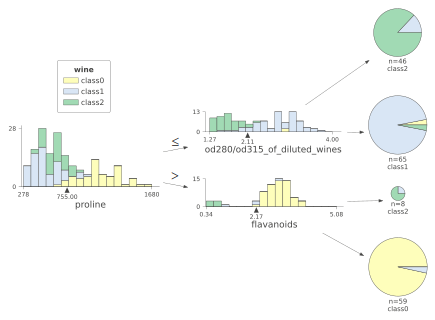

In [13]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
wine = load_wine()


X_train = wine.data
y_train = wine.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='wine',
               feature_names=wine.feature_names, 
               class_names=["class0", "class1","class2"],
               orientation='LR')
viz

分析結果

決定木分析を行い図１のような結果となった。

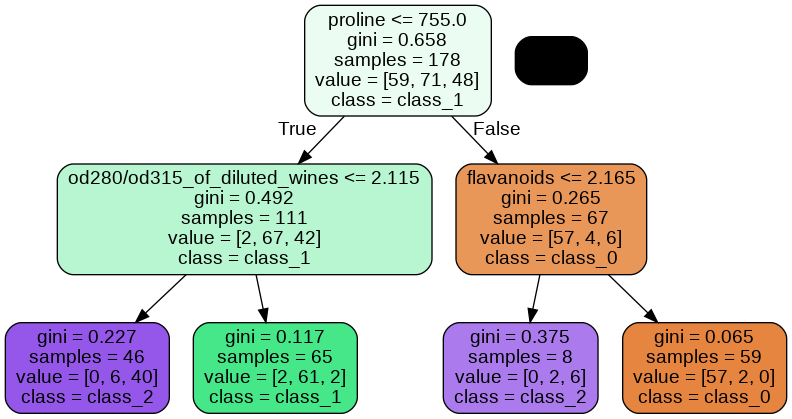

図１　ワインクラス分け決定木

最初にprolineで枝分かれし,proline<=755でod280/od315_of_diluted_wines、proline>755でflavanoidsで枝分かれしていることがわかる。  　　　　　　　　　　　　　　　　

図２に決定木を円グラフと棒グラフを用いて書き直したものを示す。

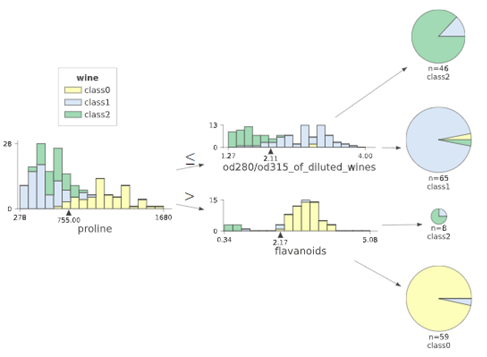
 
図２　グラフ付きワインクラス分け決定木

この図の棒グラフはそれぞれの成分ごとにどの位置にどれだけ分布しているかを示している。円グラフは最終的にどの割合で分割されたのかを可視化している。図２より約75％以上が1つのクラスが占めていることが確認できる。


考察


今回の分析で１度目の枝分かれのproline部分でclass_0のvalueが57と2で分かれておりほぼproline>755であることがわかる。このことからほかのclass_1, class_2との成分上の違いはprolineの含有量であるということが考えられる。対してclass_1,class_2はod280/od315_of_diluted_winesで枝分かれしておりこれも2.115以下はclass_1, 2.115より大きいものはclass_2でほぼ分割されている。このことから分割されているod280/od315_of_diluted_winesの含有量でclass_1とclass_2が成分上の違いがあるということが考えられる